# Determine if a person will a pay a loan or not 

In [45]:
import pandas as pd 
import numpy as np

## Import Dataset

In [62]:
df = pd.read_csv('../Datasets/credit_data.csv')
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [63]:
len(df)

2000

In [64]:
# total missing values
df.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [65]:
df = df.dropna()

In [66]:
df.isnull().sum()

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

### Define Inputs, Weights, Outputs
This is a binary classification problem 

In [67]:
# dont need client ID as input. Inputs = income, age, loan
inputs = df.iloc[:, 1:4].values
inputs

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [68]:
inputs.shape

(1997, 3)

In [69]:
# output = last column
outputs = df.iloc[:, 4].values
outputs

array([0, 0, 0, ..., 1, 0, 0])

In [70]:
outputs.shape

(1997,)

## Normalize Data: MinMaxScaler

In [90]:
# puts all the values on the same scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)
inputs

array([[0.9231759 , 0.95743135, 0.58883739],
       [0.28812165, 0.86378597, 0.47682695],
       [0.74633429, 0.99257918, 0.58262011],
       ...,
       [0.48612202, 0.69109837, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.93282208, 0.53597028]])

In [91]:
## Reshape the outputs to be our target column for our model
outputs = outputs.reshape(-1, 1)
outputs

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

## Implement Multi-layer Neural Network 

In [92]:
# determine how many neurons needed in hidden layer 
(3 + 1) //  2 

2

In [97]:
def sigmoid(s):
    return 1/ (1 + np.exp(-s))

def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

# neurons for inputs layer = 3 
weights0 = 2 * np.random.random((3, 10)) - 1
# 
weights1 = 2 * np.random.random((10, 1)) - 1 
    

In [98]:
epochs = 10000
learning_rate = .01 

error = []

for epoch in range(epochs):
    input_layer = inputs
    sum_synapse0 = np.dot(input_layer, weights0)
    hidden_layer = sigmoid(sum_synapse0)

    sum_synapse1 = np.dot(hidden_layer, weights1)
    output_layer = sigmoid(sum_synapse1)

    error_output_layer = outputs - output_layer
    average = np.mean(abs(error_output_layer))

    if epoch % 1000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
        error.append(average)

    derivative_output = sigmoid_derivative(output_layer)
    delta_output = error_output_layer * derivative_output

    weights1T = weights1.T
    delta_output_weight = delta_output.dot(weights1T)
    delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)

    hidden_layerT = hidden_layer.T
    input_x_delta1 = hidden_layerT.dot(delta_output)
    weights1 = weights1 + (input_x_delta1 * learning_rate)

    input_layerT = input_layer.T
    input_x_delta0 = input_layerT.dot(delta_hidden_layer)
    weights0 = weights0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.576236781360262
Epoch: 1001 Error: 0.10679333460878972
Epoch: 2001 Error: 0.09117682512840862
Epoch: 3001 Error: 0.08548175055909314
Epoch: 4001 Error: 0.08240730839183402
Epoch: 5001 Error: 0.08050317865443862
Epoch: 6001 Error: 0.07922498190430217
Epoch: 7001 Error: 0.0783206274387311
Epoch: 8001 Error: 0.07765779778384535
Epoch: 9001 Error: 0.0771598441873611


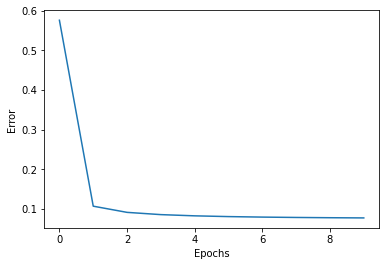

In [99]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)

In [85]:
def calculate_output(instance):
    hidden_layer = sigmoid(np.dot(instance, weights0))
    output_layer = sigmoid(np.dot(hidden_layer, weights1))
    return output_layer[0]

In [100]:
# grab a specific customer
inputs[0], outputs[0]

(array([0.9231759 , 0.95743135, 0.58883739]), array([0]))

In [101]:
round(calculate_output(inputs[0]))

0

In [102]:
inputs[4], outputs[4]

(array([0.93911717, 0.61005687, 0.63704537]), array([1]))

In [103]:
round(calculate_output(inputs[4]))

1